In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import logging
import json

# import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
############################ Generate Cities List ############################
# list for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

596

In [3]:
############################ Perform API Calls ############################
# Perform a weather check on each city using a series of successful API calls.
url = "http://api.openweathermap.org/data/2.5/weather?"

# Create list of variable values
city_names = []
cloudy_percents = []
country_names = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []

#record number
n = 0

#begin printing log of each city as it's being processed
print("Beginning Data Retrieval")
print("-----------------------------")

# Build query URL
for city in cities:
    
    #api request for each city
    response = requests.get(url + "appid=" + api_key + "&units=" + "metric" + "&q=" + city).json()
    
    #assign variable to variable name
    if response['cod'] == 200:
        n += 1
        city_name = response['name']
        cloudy_percent = response['clouds']['all']
        country_name = response['sys']['country']
        date = response['dt']
        humidity = response['main']['humidity']
        lat = response['coord']['lat']
        lng = response['coord']['lon']
        max_temp = response['main']['temp_max']
        wind_speed = response['wind']['speed']
        
        #print log for each city that is available
        print(f"Processing Record {n} of Set 1 | {city_name}")
        
    elif response['cod'] != 200:
        #print log for each city that's not available
        print("City not found. Skipping...")

    #append variable values to lists
    city_names.append(city_name)
    cloudy_percents.append(cloudy_percent)
    country_names.append(country_name)
    dates.append(date)
    humidities.append(humidity)
    lats.append(lat)
    lngs.append(lng)
    max_temps.append(max_temp)
    wind_speeds.append(wind_speed)   

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | Port Alfred
Processing Record 2 of Set 1 | Ushuaia
Processing Record 3 of Set 1 | Isangel
City not found. Skipping...
Processing Record 4 of Set 1 | Verkhnevilyuysk
Processing Record 5 of Set 1 | Kavaratti
Processing Record 6 of Set 1 | Henties Bay
Processing Record 7 of Set 1 | Esperance
Processing Record 8 of Set 1 | Bonnyville
City not found. Skipping...
Processing Record 9 of Set 1 | Junnar
City not found. Skipping...
Processing Record 10 of Set 1 | Punta Arenas
Processing Record 11 of Set 1 | Thompson
City not found. Skipping...
Processing Record 12 of Set 1 | Camacha
Processing Record 13 of Set 1 | Point Fortin
City not found. Skipping...
Processing Record 14 of Set 1 | Nchelenge
Processing Record 15 of Set 1 | Port Elizabeth
Processing Record 16 of Set 1 | Cuencame
Processing Record 17 of Set 1 | Butaritari
Processing Record 18 of Set 1 | Lata
Processing Record 19 of Set 1 | Rikitea
Processing 

Processing Record 178 of Set 1 | Les Cayes
Processing Record 179 of Set 1 | Ko Samui
Processing Record 180 of Set 1 | Vila Franca do Campo
Processing Record 181 of Set 1 | Kirakira
City not found. Skipping...
Processing Record 182 of Set 1 | Puri
Processing Record 183 of Set 1 | Chuy
Processing Record 184 of Set 1 | Madarounfa
Processing Record 185 of Set 1 | Ribeira Grande
Processing Record 186 of Set 1 | Waipawa
Processing Record 187 of Set 1 | Kearney
Processing Record 188 of Set 1 | Baykit
Processing Record 189 of Set 1 | Kaitangata
Processing Record 190 of Set 1 | Necochea
Processing Record 191 of Set 1 | Port Lincoln
City not found. Skipping...
Processing Record 192 of Set 1 | Garbolovo
Processing Record 193 of Set 1 | Muromtsevo
Processing Record 194 of Set 1 | Te Anau
Processing Record 195 of Set 1 | San Carlos de Bariloche
Processing Record 196 of Set 1 | Namyslow
Processing Record 197 of Set 1 | Sungaipenuh
Processing Record 198 of Set 1 | Neyshabur
Processing Record 199 of S

Processing Record 356 of Set 1 | Khuzhir
Processing Record 357 of Set 1 | Selizharovo
Processing Record 358 of Set 1 | Vestmannaeyjar
Processing Record 359 of Set 1 | Verkhovazhye
Processing Record 360 of Set 1 | Grand Gaube
Processing Record 361 of Set 1 | Itarema
Processing Record 362 of Set 1 | Leningradskiy
Processing Record 363 of Set 1 | Tura
Processing Record 364 of Set 1 | Nata
Processing Record 365 of Set 1 | Clyde River
Processing Record 366 of Set 1 | Xuanzhou
Processing Record 367 of Set 1 | Nyuksenitsa
Processing Record 368 of Set 1 | Bethanien
City not found. Skipping...
Processing Record 369 of Set 1 | Snezhnogorsk
Processing Record 370 of Set 1 | Wanning
Processing Record 371 of Set 1 | Paita
Processing Record 372 of Set 1 | Lagunas
City not found. Skipping...
Processing Record 373 of Set 1 | Santa Lucia
Processing Record 374 of Set 1 | Saint-Francois
Processing Record 375 of Set 1 | Yate
Processing Record 376 of Set 1 | Dunedin
Processing Record 377 of Set 1 | Tabory
P

In [4]:
#put variable lists into pandas data frame
city_data = pd.DataFrame({'City': city_names,
                          'Cloudiness': cloudy_percents,
                          'Country': country_names,
                          'Date': dates,
                          'Humidity': humidities,
                          'Lat': lats,
                          'Lng': lngs,
                          'Max Temp': max_temps,
                          'Wind Speed': wind_speeds})

In [5]:
#check the number of rows for each column
city_data.count()

City          596
Cloudiness    596
Country       596
Date          596
Humidity      596
Lat           596
Lng           596
Max Temp      596
Wind Speed    596
dtype: int64

In [6]:
#display the first 5 rows of the data frame
city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Port Alfred,80,ZA,1546737636,88,-33.59,26.89,19.31,5.41
1,Ushuaia,40,AR,1546736400,53,-54.81,-68.31,10.00,4.10
2,Isangel,64,VU,1546737769,99,-19.55,169.27,25.91,8.26
3,Isangel,64,VU,1546737769,99,-19.55,169.27,25.91,8.26
4,Verkhnevilyuysk,56,RU,1546737770,70,63.45,120.31,-20.87,2.71


In [7]:
#Export City data into a CSV File
city_data.to_csv("City_Weather_Data.csv", index=False, header=True)

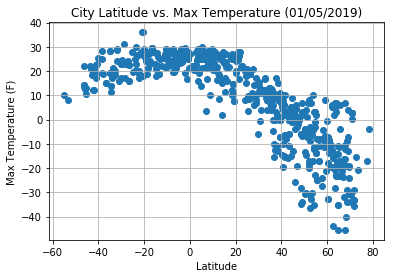

In [8]:
###########Latitude vs. Maximum Temperature Plot############
plt.scatter(city_data['Lat'], city_data['Max Temp'])
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title('City Latitude vs. Max Temperature (01/05/2019)')
plt.savefig("Lat_Temp.png")
plt.show()

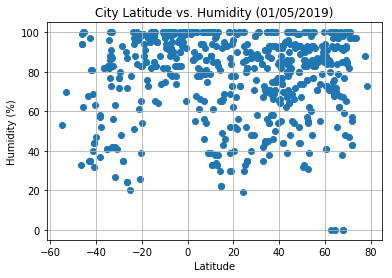

In [9]:
###########Latitude vs. Humidity Plot############
plt.scatter(city_data['Lat'], city_data['Humidity'])
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title('City Latitude vs. Humidity (01/05/2019)')
plt.savefig("Lat_Humidity.png")
plt.show()

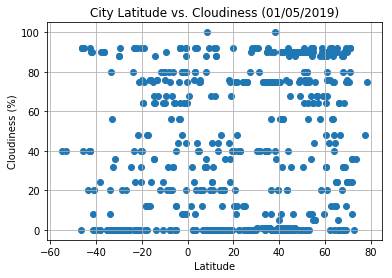

In [10]:
###########Latitude vs. Cloudiness Plot############
plt.scatter(city_data['Lat'], city_data['Cloudiness'])
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title('City Latitude vs. Cloudiness (01/05/2019)')
plt.savefig("Lat_Cloudiness.png")
plt.show()

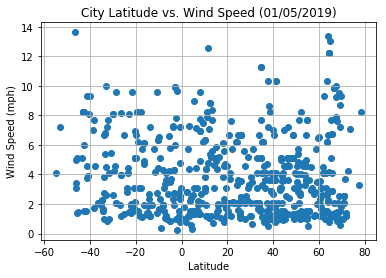

In [11]:
###########Latitude vs. Wind Speed Plot############
plt.scatter(city_data['Lat'], city_data['Wind Speed'])
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title('City Latitude vs. Wind Speed (01/05/2019)')
plt.savefig("Lat_Wind_Speed.png")
plt.show()

In [ ]:
########## 3 Observable Trends based on the data ##################
# 1. The temperature increases closer to latitude 0 and decreases moving away from it.
# 2. Most cities have at least 20% humidity.
# 3. Most cities have a wind speed less than 10 mph.